# In this notebook we will show examples and explain the significance of cross validation

#### <b>Cross validation </b> is the process of <i>validating</i> the performance of a trained machine learning model.  
This is generally considered the most important step in creating a machine learning model, as it is both used to tune the features (predictor variables) and to get an estimate of how well the model is performing.  However, there are many different ways to perform cross validation, and some of them can give misleading results.  There is no one 'right' way to cross validate a model, so we have used multiple different strategies and metrics to get an idea of our model's performance.  

In [12]:
# Set a working directory
#!pip install GitPython
import git
import os

repo = git.Repo('.', search_parent_directories=True)


os.chdir(repo.working_tree_dir)

In [13]:
#!pip install global_land_mask
import pandas as pd
import numpy as np
from global_land_mask import globe
from sklearn.model_selection import train_test_split
import joblib



In [14]:
%run 'cross_validation/functions.ipynb'

Index(['time', 'cruise', 'lat', 'lon', 'biomass', 'sss', 'sst', 'ugos', 'vgos',
       'Fe', 'O2', 'NO3', 'PO4', 'Si', 'ALK', 'hours_since_sunrise'],
      dtype='object')
(4679, 11)
<class 'numpy.ndarray'>
(4679,)


## Testing and training sets

To perform cross validation, you first must split your training data into testing and training sets.  The <u>training</u> set is the data that the model is trained on, while the <u>testing</u> set is the data that the model 'predicts on'.  In other words, the testing set is used to validate the models performance, as we can compare the real data from the testing set to the model predictions.  In terms of this project, that means that some of our seaflow data will be used to test the predictions of models trained on the rest of the seaflow data.

### The simplest way to split testing and training data is to set aside a validation set 
This simply means that one chunk of your data is left out for testing, and the model is trained on the rest.

The major flaw with this trategy is it greatly depends on what specific chunk of data we leave out.  In this case, I chose to leave out the first 600 data points, or about 15 cruises.  The model is trained on the rest.  The code can be found in [notebook functions.ipynb](functions.ipynb)

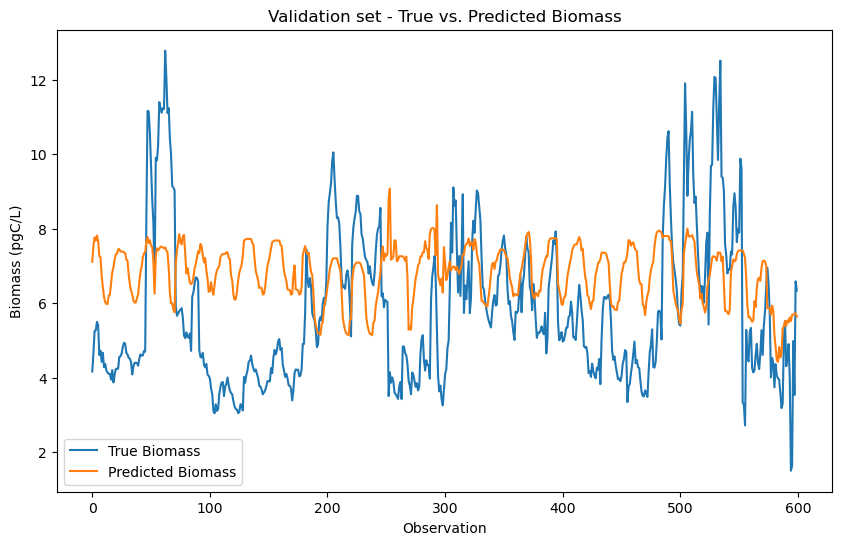

2.231037801699978


In [15]:
val_set_RMSE = val_set(features_pro, labels_pro)
print(val_set_RMSE)

### One of the most common ways to split testing/training sets is to randomly sample the data
#### This is a poor idea for our project, with more being explained in [notebook 01_auto_cor.ipynb](01_auto_cor.ipynb)
Here is an example showing the RMSE (error metric) vs the ratio of testing vs training for the model.  As discussed in [notebook 01_auto_cor.ipynb](01_auto_cor.ipynb), this is a poor representation of performance

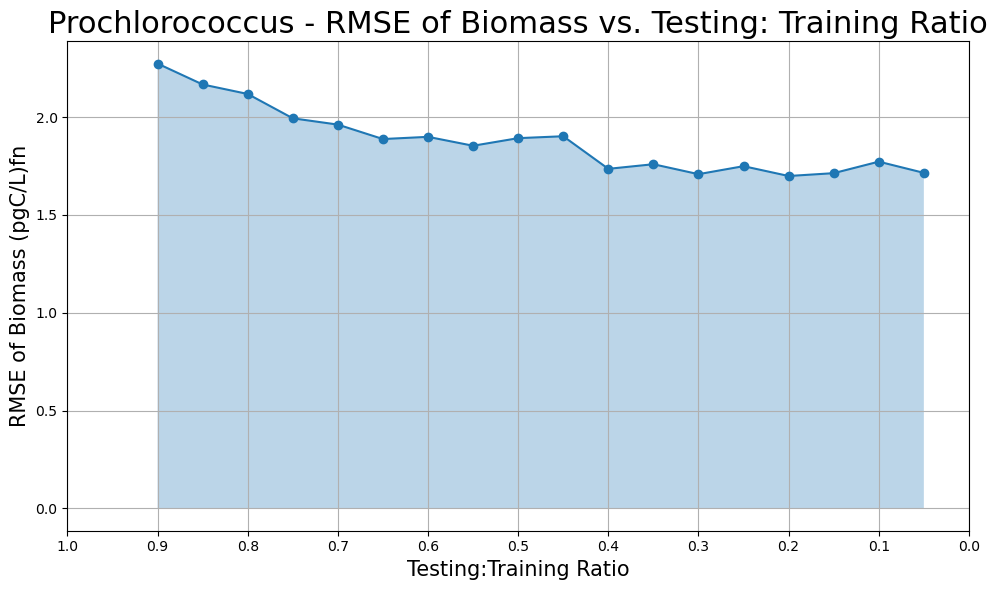

In [16]:
R_RMSEs = testing_training_ratio_random(features = features_pro, labels = labels_pro,
                                        feature_list=feature_list_pro, title_prefix="Prochlorococcus")

## Another simple way to do cross validation is called k-fold
This is a version of leave-one-out testing, but instead of just leaving out a single chunk, the dataset is split into equal length chunks, and then each of these 'folds' in turn is used to test the model, while it is trained on the rest of the data.

![Python logo](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_002.png) 

The above diagram is a visual representation of how the data is split into testing and training sets for k-fold, where the blue is training data and the orange is testing data.  In this example, k = 5 for 5 folds, and each is used once to test the model.  This means that every data point is tested exactly once, and the model is never trained on the same data that it is being tested on. 

#### K-fold with our SeaFlow data
For our k-fold cross validation, we used 8 fold validation and split the dataset cronologically.  This means that fold 1 is the first 12.5% of the dataset, fold 2 the next 12.5%, and so on.  In the graphs below, you can see how the model performed on each of these folds.  

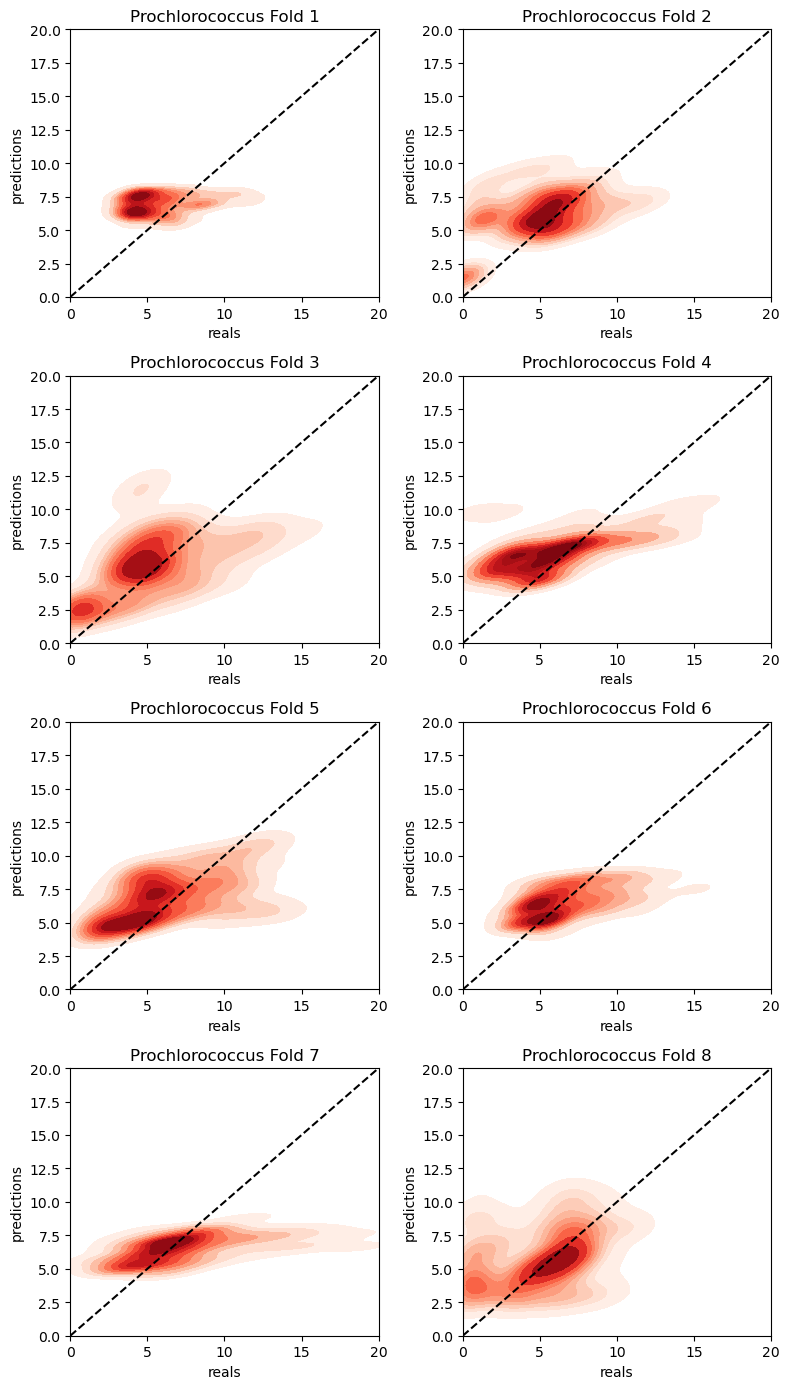

In [17]:
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)

model_training(train_features, train_labels, test_features, test_labels, hyperparameters={'n_estimators': 200, 'max_depth': 10, 'max_features': 'sqrt'})

predict_kfold(test_features, test_labels, train_labels, train_features)

plot_predictions()

## Here are the predictions for all cruises , with the colored dots indicating the real biomass, the color of the dots indicating the fold, and the red line indicating the prediction.

In [18]:
train_features, test_features, train_labels, test_labels = k_fold(features_pro, labels_pro, 8)
predictions, maes, rmses, rmse = predict_kfold(test_features, test_labels, train_labels, train_features)
merged_df = covari_predictions(predictions)
create_fold_predictions_time(merged_df, title_prefix='Prochlorococcus')